### Шаг 1: Сформулируй нулевую гипотезу

Входные данные:


Продакт-менеджер некастодиального криптовалютного кошелька 'X' твердо убежден, что 75% пользователей - довольны приложением. Мы опросили 100 человек, оказалось, что довольны - 68.

Формулируем гипотезы:

H0 = удовлетворенность пользователей некастодиального кошелька == 75%
H1 = удовлетворенность пользователей < 75%

### Шаг 2: Прими нулевую гипотезу за данность и поставь задачу поиска вероятности

Решим, что продакт-менеджер прав. В таком случае, какова вероятность при 75% удовлетворенности клиентов, получить такой же результат и хуже при выборке того же размера (100 человек). Иначе говоря, поиск p-value.

### Шаг 3: Определяем метод решения поставленной задачи

Методы:

1.) Монте-карло (также известен как Bootstrap) - актуален всегда, но достаточно долгий
2.) Z-test - статистический тест, который работает только при нормальном распределении. Является short-cut'ом, ускоряющим процедуру проверки статистических гипотез

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns

In [60]:
#Используем Монте-Карло (Bootstrap)

##Этап 1: имитируем входные данные через генератор распределения.

###Кол-во исходов - 2: доволен/не доволен. Пусть исходы будут эквивалентны фиктивным переменным: 0 и 1
###Размер выборки - 100 человек
###Кол-во довольных - 68.
###Возвращаем либо True (доволен), либо False (недоволен)

np.random.binomial(1, 0.75, size = 100).mean() <= 0.68

###Проведем эксперимент и посчитаем в среднем в скольких кол-ве случаев (в процентах)
###Мы способны получить такой же результат и хуже при выборке того же размера (100 человек)
###Для этого используем цикл из 10-ти тысяч повторений, чтобы приблизиться к истинному среднему
###Подробнее, почему так: см. "Центральную предельную теорему"

np.mean([np.random.binomial(1, 0.75, size = 100).mean() <= 0.68 for _ in range (10000)])

0.0677

<AxesSubplot:ylabel='Count'>

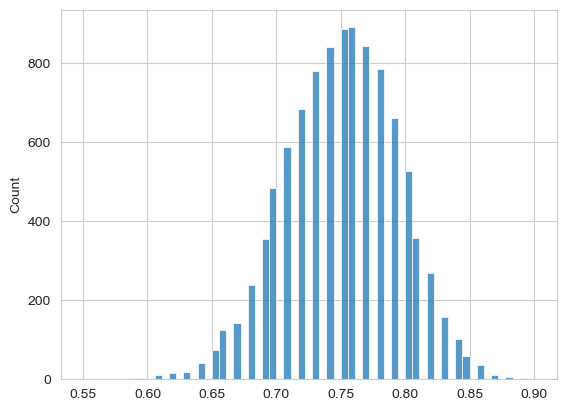

In [61]:
#Используем Z-test (статистический тест)

##Этап 1: Доказываем нормальность распределения

sns.histplot([np.random.binomial(1, 0.75, size = 100).mean() for _ in range (10000)])

<AxesSubplot:ylabel='Density'>

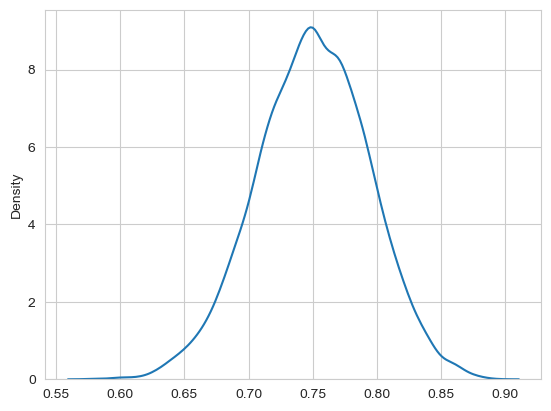

In [62]:
###Давайте построем KDE-plot (аппроксимируем нашу гистограмму)
sns.kdeplot([np.random.binomial(1, 0.75, size = 100).mean() for _ in range (10000)])

In [63]:
###Как мы видим, распределение близкое к нормальному. Мы можем применять статистический тест.
###Кстати, p-value на гистограмме является площадью части фигуры нашего распределения.
###Той, где значения меньше или равны результатам реального эксперимента (<= 68%) ~ 0.68.
###Пусть, общая площадь равна 1, тогда площадь p-value = 0.0677 ≈ 6.77% от всей фигуры

In [64]:
##Этап 2: Z-test

from statsmodels.stats.proportion import proportions_ztest

###Входные данные:
###Кол-во успехов в реальном эксперименте = 68
###Кол-во наблюдений = 100
###Значение нулевой гипотезы (H0) = 75% ~ 0.75
###Альтернатива = smaller

proportions_ztest(68,100,value=0.75,alternative='smaller')

(-1.5006126199969514, 0.06672789264987333)

In [65]:
###По результатам Z-test, p-value ≈ 0.0667

###Вычисление p-value в обоих случаях дало больше, чем 0.05
###Где 0.05 = выбранный мной уровень значимости/Alpha (вероятность отвергнуть верную нулевую гипотезу).

###Наш вывод: разница статистически не значима.
####Иначе говоря, появление имеющихся данных (или ещё более крайних данных) не является маловероятным
###Интерпретация: результат соответствует гипотезе.

###Следовательно, нулевую гипотезу не следует отвергать.
###Следовательно, нулевая гипотеза остаётся в силе.